**Савин Александр**  
**Вариант 5**  

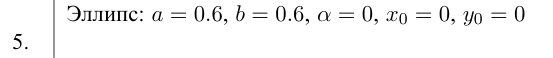

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

import math
import numpy as np
import matplotlib.pyplot as plt
import time
import random

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='latin1')
    return dict

In [ ]:
import os
files = os.listdir('drive/MyDrive/cifar-10-batches-py')
print('drive/MyDrive/cifar-10-batches-py/' + files[0])

arr = []
for i in files:
  print(i)
  arr.append(unpickle('drive/MyDrive/cifar-10-batches-py/' + i))

drive/MyDrive/cifar-10-batches-py/test_batch
test_batch
data_batch_3
data_batch_2
data_batch_5
data_batch_1
data_batch_4
batches.meta


In [ ]:
def load_train_data(path, requested_label):
  datadict = unpickle(path)
  labels = datadict['labels']
  inputs = datadict['data']
  dataset = []
  for image, label in zip(inputs, labels):
    if label == requested_label:
      image = np.asarray(image, dtype = np.float32)
      image = (image - 127.5) / 127.5
      dataset += [(image, image)]
  return dataset

In [ ]:
def plain_to_image(image, width = 32, height = 32):
  image = (image + 1) / 2
  image = np.reshape(image, (3, height, width))
  image = np.transpose(image, [1, 2, 0])
  return image

In [ ]:
def on_slider_update(axes, decoder, feature, val):
  global core_data
  core_data[feature] = val
  image = decoder(torch.from_numpy(core_data)).detach().numpy()
  image = plain_to_image(image)
  axes.set_array(image)

In [ ]:
def on_button_click(axes_gt, axes_out, axes_mod, encoder, decoder, data, not_random_value):
  global core_data
  # image = data[np.random.randint(low = 0, high = len(data))][0]
  image = data[not_random_value][0]
  enc_out = encoder(torch.from_numpy(image)).detach().numpy()
  dec_out = decoder(torch.from_numpy(enc_out)).detach().numpy()
  core_data = np.copy(enc_out)
  axes_gt.set_array(plain_to_image(image))
  axes_out.set_array(plain_to_image(dec_out))
  axes_mod.set_array(plain_to_image(dec_out))
  plt.draw()

In [ ]:
epochs = 200
width, height = 32, 32
dim_1 = width * height * 3
dim_2, dim_3 = int(dim_1 * 1.5), int(dim_1 / 32.0)

In [ ]:
encoder = nn.Sequential(
    nn.Linear(in_features=dim_1, out_features=dim_2),
    nn.Linear(in_features=dim_2, out_features=dim_3),
    nn.Tanh(),
)

decoder = nn.Sequential(
    nn.Linear(in_features=dim_3, out_features=dim_2),
    nn.Linear(in_features=dim_2, out_features=dim_1),
    nn.Tanh(),
)

optimizer_enc = optim.Adam(encoder.parameters(), lr=1e-5)
optimizer_dec = optim.Adam(decoder.parameters(), lr=1e-5)

In [ ]:
train_data = []
train_data += load_train_data(path='drive/MyDrive/cifar-10-batches-py/data_batch_5', requested_label=5)
np.random.shuffle(train_data)

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=32, shuffle=True)
print('dim_1: %d, dim_2: %d, dim_3: %d, samples: %d' % (dim_1, dim_2, dim_3, len(train_data)))

dim_1: 3072, dim_2: 4608, dim_3: 96, samples: 1025


In [ ]:
encoder.train()
decoder.train()

Sequential(
  (0): Linear(in_features=96, out_features=4608, bias=True)
  (1): Linear(in_features=4608, out_features=3072, bias=True)
  (2): Tanh()
)

In [ ]:
train_loss = []
for i in range(epochs):
  pbar = tqdm(enumerate(train_loader))

  for j, (input, output_gt) in pbar:
    output_enc = encoder(input)
    output_dec = decoder(output_enc)
    
    crit = nn.MSELoss()
    loss = torch.sqrt(crit(output_gt, output_dec))
    train_loss += [loss.item()]

    optimizer_enc.zero_grad()
    optimizer_dec.zero_grad()
    loss.backward()
    optimizer_enc.step()
    optimizer_dec.step()

    pbar.set_description('%d. loss: %f' % (i + 1, train_loss[-1]))

1. loss: 0.323558: : 33it [00:13,  2.52it/s]
2. loss: 0.486186: : 33it [00:13,  2.45it/s]
3. loss: 0.324821: : 33it [00:13,  2.44it/s]
4. loss: 0.384116: : 33it [00:12,  2.65it/s]
5. loss: 0.348110: : 33it [00:12,  2.69it/s]
6. loss: 0.227252: : 33it [00:11,  2.89it/s]
7. loss: 0.241867: : 33it [00:12,  2.54it/s]
8. loss: 0.288994: : 33it [00:13,  2.37it/s]
9. loss: 0.191527: : 33it [00:15,  2.11it/s]
10. loss: 0.268071: : 33it [00:18,  1.76it/s]
11. loss: 0.314637: : 33it [00:13,  2.37it/s]
12. loss: 0.346154: : 33it [00:12,  2.70it/s]
13. loss: 0.166317: : 33it [00:12,  2.68it/s]
14. loss: 0.228419: : 33it [00:13,  2.43it/s]
15. loss: 0.299322: : 33it [00:12,  2.66it/s]
16. loss: 0.288309: : 33it [00:12,  2.62it/s]
17. loss: 0.193000: : 33it [00:13,  2.53it/s]
18. loss: 0.324786: : 33it [00:13,  2.53it/s]
19. loss: 0.245027: : 33it [00:12,  2.61it/s]
20. loss: 0.254657: : 33it [00:11,  2.85it/s]
21. loss: 0.267730: : 33it [00:11,  2.76it/s]
22. loss: 0.172145: : 33it [00:11,  2.76it/

In [ ]:
encoder.eval()
decoder.eval()

Sequential(
  (0): Linear(in_features=96, out_features=4608, bias=True)
  (1): Linear(in_features=4608, out_features=3072, bias=True)
  (2): Tanh()
)

In [ ]:
features = np.random.randint(low = 0, high = dim_3, size = 3)
features

array([13, 26, 85])

In [ ]:
random_image = np.random.randint(low = 0, high = len(train_data))

In [ ]:
valinit1 = 0.75
valinit2 = -0.75
valinit3 = 0.51

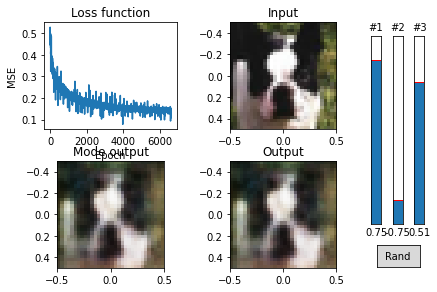

In [ ]:
from matplotlib.widgets import Slider, Button

fig, axes = plt.subplots(2, 2)
fig.tight_layout()

axes[0, 0].set_title('Loss function')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].plot(train_loss)

axes[0, 1].set_title('Input')
axes[0, 1].set_aspect(1)
ax_gt = axes[0, 1].imshow([[0]])

axes[1, 0].set_title('Mode output')
axes[1, 0].set_aspect(1)
ax_mod = axes[1, 0].imshow([[0]])

axes[1, 1].set_title('Output')
axes[1, 1].set_aspect(1)
ax_out = axes[1, 1].imshow([[0]])

from matplotlib.widgets import Slider, Button

axs_1 = fig.add_axes([0.85, 0.25, 0.0225, 0.65])
slid_1 = Slider(ax=axs_1, label='#1', valinit=valinit1, valmin=-1.0, valmax=1.0, orientation='vertical')
slid_1.on_changed(lambda val: on_slider_update(ax_mod, decoder, features[0], val))

axs_2 = fig.add_axes([0.9, 0.25, 0.0225, 0.65])
slid_2 = Slider(ax=axs_2, label='#2', valinit=valinit2, valmin=-1.0, valmax=1.0, orientation='vertical')
slid_2.on_changed(lambda val: on_slider_update(ax_mod, decoder, features[1], val))

axs_3 = fig.add_axes([0.95, 0.25, 0.0225, 0.65])
slid_3 = Slider(ax=axs_3, label='#3', valinit=valinit3, valmin=-1.0, valmax=1.0, orientation='vertical')
slid_3.on_changed(lambda val: on_slider_update(ax_mod, decoder, features[2], val))

axs_4 = fig.add_axes([0.8625, 0.1, 0.1, 0.075])
btn = Button(axs_4, 'Rand')
btn.on_clicked(lambda event_:on_button_click(ax_gt, ax_out, ax_mod, encoder, decoder, train_data))
on_button_click(ax_gt, ax_out, ax_mod, encoder, decoder, train_data, random_image)

plt.subplots_adjust(right=0.8)
plt.show()